## Analysis of Data from November 2018 Election for 10th US Congressionsl District

My wife worked on Democrat Josh Harder's successful campaign against a Republican incumbent congressman.  They both went to Harvard Business School, and he called her to ask her to help out.  Unfortunately, I have not yet been able to finish this project because I have not yet obtained precinct-level data for one of the two counties involved, San Joaquin county.  I am submitting this now because I have run out of time.  I am still trying to obtain this data and will finish the project when I do.

In [1]:
# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# input file
voterFile = "18GCASTA.ASC"
fhand = open(voterFile,'r')


In [3]:
# a function used later to group cities
def cityGroup(x):
    return {
        'CERES': 'Ceres',
        'MODESTO': 'Modesto',
        'OAKDALE': 'Oakdale',
        'PATTERSON': 'Patterson',
        'RIVERBANK': 'Riverbank',
        'TURLOCK': 'Turlock'
    }.get(x, 'Other') 

In [4]:
# create list of dictionaries at precoinct level

# two initializations
n = 0
overallList = []

# read input file and append to list of dictionaries
for line in fhand:

    n = n + 1
    
    contest = line[0:4]
    candidate = line[4:7]
    precinctCode = line[7:11]
    numVotes = int(line[11:17])
    precinctName = line[121:151]
    
    regVote = 0
    castVote = 0
    DenhamVote = 0
    HarderVote = 0
    overVote = 0
    underVote = 0
    
    if contest == "0101":
        regVote = numVotes
    if contest == "0102":
        castVote = numVotes
    if contest == "0112" and candidate == "001":
        DenhamVote = numVotes
    if contest == "0112" and candidate == "002":
        HarderVote = numVotes
    if contest == "0112" and candidate == "003":
        oerVote = numVotes
    if contest == "0112" and candidate == "004":
        underVote = numVotes
    
    firstSpace = precinctName.find(' ',1)
    secondSpace = precinctName.find(' ',firstSpace + 1)
    city = precinctName[firstSpace + 1:secondSpace]
    
    group = cityGroup(city)
    
    voteDict = {
        "1 precinct code":precinctCode,
        "2 precinct name":precinctName,
        "3 registered":regVote,
        "4 cast":castVote,
        "5 Denham":DenhamVote,
        "6 Harder":HarderVote,
        "7 over":overVote,
        "8 under":underVote,
        "9 city":city,        
        "city group":group        
    }
    
    overallList.append(voteDict)
    
    

In [5]:
# create data frame, with multiple rows for each precinct
df = pd.DataFrame(overallList)
df.head()

,1 precinct code,2 precinct name,3 registered,4 cast,5 Denham,6 Harder,7 over,8 under,9 city,city group
0,0001,101002 AIRPORT 2-4,192,0,0,0,0,0,AIRPORT,Other
1,0002,"102001 CASWELL 1 CLUB 3B,",598,0,0,0,0,0,CASWELL,Other
2,0003,"102002 CASWELL 2,4",93,0,0,0,0,0,CASWELL,Other
3,0004,102003 CASWELL 3A,207,0,0,0,0,0,CASWELL,Other
4,0005,"102005 CASWELL 5,6,11,12,",594,0,0,0,0,0,CASWELL,Other


In [6]:
# using groupby, create data frame with one row for each precinct
df1 = df.groupby(['1 precinct code'])
precinct_df = pd.DataFrame(df1['2 precinct name'].min())
precinct_df ['city'] = df1['9 city'].min()
precinct_df ['registered'] = df1['3 registered'].sum()
precinct_df ['cast'] = df1['4 cast'].sum()
precinct_df ['Denham'] = df1['5 Denham'].sum()
precinct_df ['Harder'] = df1['6 Harder'].sum()
precinct_df ['over'] = df1['7 over'].sum()
precinct_df ['under'] = df1['8 under'].sum()
precinct_df ['city group'] = df1['city group'].min()
precinct_df ["not vote"] = precinct_df["registered"] - precinct_df["cast"]
precinct_df["Denham %"] = round(100 * precinct_df ['Denham'] / (precinct_df ['Denham']+precinct_df ['Harder']),1)
precinct_df["Harder %"] = round(100 * precinct_df ['Harder'] / (precinct_df ['Denham']+precinct_df ['Harder']),1)
precinct_df.reset_index(inplace=True)
precinct_df

,1 precinct code,2 precinct name,city,registered,cast,Denham,Harder,over,under,city group,not vote,Denham %,Harder %
0,0001,101002 AIRPORT 2-4,AIRPORT,192,41,12,29,0,0,Other,151,29.3,70.7
1,0002,"102001 CASWELL 1 CLUB 3B,",CASWELL,598,157,32,122,0,2,Other,441,20.8,79.2
2,0003,"102002 CASWELL 2,4",CASWELL,93,24,8,16,0,0,Other,69,33.3,66.7
3,0004,102003 CASWELL 3A,CASWELL,207,37,6,31,0,0,Other,170,16.2,83.8
4,0005,"102005 CASWELL 5,6,11,12,",CASWELL,594,164,29,130,0,5,Other,430,18.2,81.8
5,0006,102007 CASWELL 7,CASWELL,134,56,24,32,0,0,Other,78,42.9,57.1
6,0007,"103001 CERES 1,7,21,24,25",CERES,800,312,123,187,0,2,Ceres,488,39.7,60.3
7,0008,"103002 CERES 2,8B,10,20",CERES,881,424,207,209,0,8,Ceres,457,49.8,50.2
8,0009,"103003 CERES 3,14,17,40",CERES,672,243,102,141,0,0,Ceres,429,42.0,58.0
9,0010,"103004 CERES 4,5,16,19,32",CERES,721,286,90,189,0,7,Ceres,435,32.3,67.7


In [7]:
# using bins, add another column to precinct data frame
bins = [0, 29.99, 34.99, 39.99, 44.99, 49.99, 54.99, 59.99, 64.99, 69.99, 100]
group_names = ["0-30%", "30-35%", "35-40%", "40-45%", "45-50%", "50-55%", "55-60%", "60-65%", "65-70%", "70-100%"]
precinct_df["Harder % Category"] = pd.cut(precinct_df["Harder %"], bins,
  labels=group_names)
precinct_df.head()

,1 precinct code,2 precinct name,city,registered,cast,Denham,Harder,over,under,city group,not vote,Denham %,Harder %,Harder % Category
0,0001,101002 AIRPORT 2-4,AIRPORT,192,41,12,29,0,0,Other,151,29.3,70.7,70-100%
1,0002,"102001 CASWELL 1 CLUB 3B,",CASWELL,598,157,32,122,0,2,Other,441,20.8,79.2,70-100%
2,0003,"102002 CASWELL 2,4",CASWELL,93,24,8,16,0,0,Other,69,33.3,66.7,65-70%
3,0004,102003 CASWELL 3A,CASWELL,207,37,6,31,0,0,Other,170,16.2,83.8,70-100%
4,0005,"102005 CASWELL 5,6,11,12,",CASWELL,594,164,29,130,0,5,Other,430,18.2,81.8,70-100%


In [8]:
# using groupby, create a summary data frame, by precinct category (used below to create bar chart)
dfh = precinct_df.groupby(['Harder % Category'])
percent_group_df = pd.DataFrame(dfh['Harder'].sum())
percent_group_df ['Denham'] = dfh['Denham'].sum()
percent_group_df.reset_index(inplace=True)
percent_group_df

,Harder % Category,Harder,Denham
0,0-30%,2526,7257
1,30-35%,3484,7179
2,35-40%,2563,4126
3,40-45%,5964,8238
4,45-50%,9972,10967
5,50-55%,15293,13867
6,55-60%,16646,12644
7,60-65%,7796,4623
8,65-70%,6183,3008
9,70-100%,10965,3426


In [9]:
# using groupby, create a summary data frame, by city
df2 = precinct_df.groupby(['city'])
city_df = pd.DataFrame(df2['registered'].sum())
city_df ['cast'] = df2['cast'].sum()
city_df ['Denham'] = df2['Denham'].sum()
city_df ['Harder'] = df2['Harder'].sum()
city_df ['over'] = df2['over'].sum()
city_df ['under'] = df2['under'].sum()
city_df ['city group'] = df2['city group'].min()
city_df["Denham %"] = round(100 * city_df ['Denham'] / (city_df ['Denham']+city_df ['Harder']),1)
city_df["Harder %"] = round(100 * city_df ['Harder'] / (city_df ['Denham']+city_df ['Harder']),1)
city_df.reset_index(inplace=True)

city_df

,city,registered,cast,Denham,Harder,over,under,city group,Denham %,Harder %
0,AIRPORT,564,186,48,137,0,1,Other,25.9,74.1
1,CASWELL,4618,2073,565,1465,0,40,Other,27.8,72.2
2,CERES,20295,11681,4204,7300,0,174,Ceres,36.5,63.5
3,CHATOM,1022,699,423,263,0,13,Other,61.7,38.3
4,CLAUS,1076,724,464,249,0,11,Other,65.1,34.9
5,CLUB,3137,1866,748,1090,0,28,Other,40.7,59.3
6,COFFEE,2594,1918,1188,710,0,20,Other,62.6,37.4
7,CROWS,3128,2099,1336,739,0,24,Other,64.4,35.6
8,DEL,1030,666,356,300,0,10,Other,54.3,45.7
9,DENAIR,4737,3273,2094,1112,0,67,Other,65.3,34.7


In [10]:
# using groupby, create a summary data frame, this time by city group
df3 = precinct_df.groupby(['city group'])
group_df = pd.DataFrame(df3['registered'].sum())
group_df ['cast'] = df3['cast'].sum()
group_df ['Denham'] = df3['Denham'].sum()
group_df ['Harder'] = df3['Harder'].sum()
group_df ['over'] = df3['over'].sum()
group_df ['under'] = df3['under'].sum()
group_df ['not vote'] = df3['not vote'].sum()
group_df.reset_index(inplace=True)

group_df

,city group,registered,cast,Denham,Harder,over,under,not vote
0,Ceres,20295,11681,4204,7300,0,174,8614
1,Modesto,102498,65384,28555,35845,0,976,37114
2,Oakdale,11334,7819,4759,2929,0,130,3515
3,Other,60045,38937,21777,16547,0,602,21108
4,Patterson,9255,5718,1786,3839,0,92,3537
5,Riverbank,10566,6747,3054,3581,0,110,3819
6,Turlock,33840,22940,11211,11351,0,372,10900


Text(0.5, 1.0, 'Summary of Total Votes')

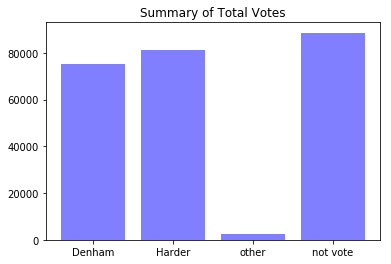

In [11]:
# bar chart with total votes
users = [
    group_df ['Denham'].sum(),
    group_df ['Harder'].sum(),
    group_df ['under'].sum(),
    group_df ['not vote'].sum()
]
x_axis = np.arange(len(users))
plt.bar(x_axis, users, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Denham", "Harder", "other", "not vote"])
plt.title("Summary of Total Votes")


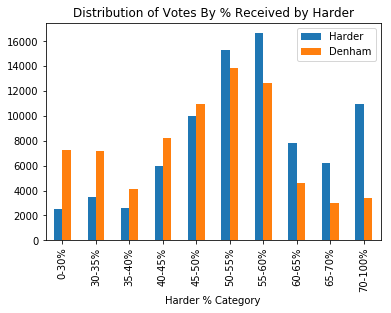

In [12]:
# bar chart with distribution of votes by % received buy one of candidates
for_bar_chart2 = percent_group_df[['Harder % Category',"Harder","Denham"]]
for_bar_chart2 = for_bar_chart2.set_index("Harder % Category")
for_bar_chart2.plot(kind="bar")
plt.title("Distribution of Votes By % Received by Harder")
plt.show()


Index(['city group', 'registered', 'cast', 'Denham', 'Harder', 'over', 'under',
       'not vote'],
      dtype='object')


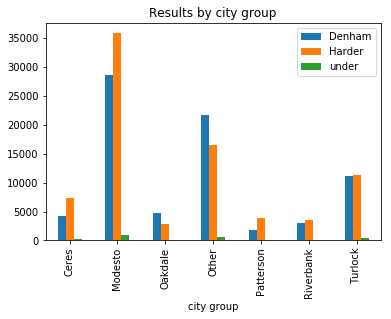

In [13]:
# bar chart with results by city group
print(group_df.columns)
for_bar_chart = group_df[['city group',"Denham","Harder","under"]]
for_bar_chart = for_bar_chart.set_index("city group")
for_bar_chart.plot(kind="bar")
plt.title("Results by city group")
plt.show()


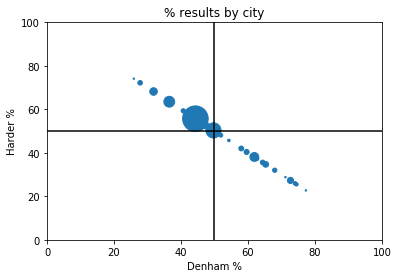

In [14]:
# scatter plot with results by city group
plt.scatter(city_df["Denham %"], city_df["Harder %"], s = city_df["cast"] / 100, marker="o")
plt.title("% results by city")
plt.xlabel("Denham %")
plt.ylabel("Harder %")
plt.xlim(0,100)
plt.ylim(0,100)
plt.hlines(50,0,100)
plt.vlines(50,0,100)
plt.show()


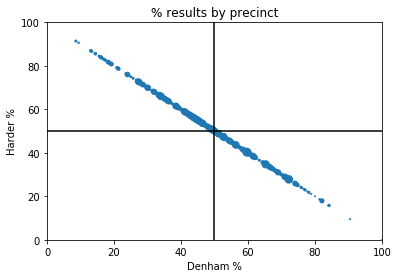

In [15]:
# scatter plot with results by city
plt.scatter(precinct_df["Denham %"], precinct_df["Harder %"], s = precinct_df["cast"] / 40, marker="o")
plt.title("% results by precinct")
plt.xlabel("Denham %")
plt.ylabel("Harder %")
plt.xlim(0,100)
plt.ylim(0,100)
plt.hlines(50,0,100)
plt.vlines(50,0,100)
plt.show()


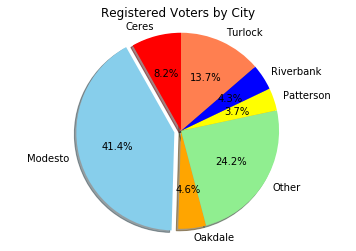

In [16]:
# data to be used for pie chart
labels = group_df["city group"]
sizes = group_df["registered"]
colors = ["red","skyblue","orange","lightgreen", "yellow","blue","coral"]
explode = [0,0.07,0,0,0,0,0]

# crate pie chart
plt.pie(sizes, labels=labels, explode=explode,
   autopct="%1.1f%%",  colors = colors,
  shadow=True, startangle=90)
plt.axis("equal")
plt.title("Registered Voters by City")
plt.show()


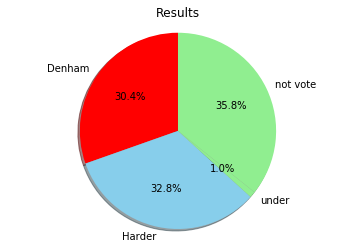

In [17]:
# data to be used for pie chart
labels = ['Denham', 'Harder', 'under', 'not vote']
sizes = [
    group_df ['Denham'].sum(),
    group_df ['Harder'].sum(),
    group_df ['under'].sum(),
    group_df ['not vote'].sum()
]
colors = ["red","skyblue","lightgreen", "lightgreen"]
explode = [0,0,0,0]

# crate pie chart
plt.pie(sizes, labels=labels, explode=explode,
   autopct="%1.1f%%",  colors = colors,
  shadow=True, startangle=90)
plt.axis("equal")
plt.title("Results")
plt.show()


# Some Conclusions So Far

1. About one-third of the registered voters did not vote
2. Most of the votes came from precincts which were competitive, but there were many precincts which were one-sided because one candudate got over 60% of the votes
3. Harder won 5 of the 6 largest cities, but his opponent Denhm received more votes from the smasller cities















